# Tracebacks

Un traceback es el cuerpo del texto que puede apuntar al origen (y al final) de un error no controlado. Comprender los componentes de un traceback hará que seas más eficaz al corregir errores o depurar un programa que no funciona bien.

La primera vez que encuentres excepciones en Python podrías verte tentado/a a evitar el error suprimiéndolo. Cuando un programa sufre un error no controlado, aparece un traceback como salida. Como verás en este módulo, los tracebacks son útiles. Hay maneras de controlar correctamente los errores para que no aparezcan o muestren información útil.

Si intentamos en un notebook, abrir un archivo inexistente sucede lo siguiente:

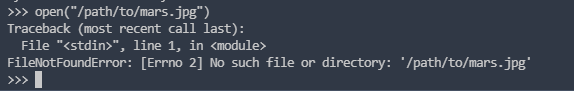

In [2]:
from IPython.display import Image
Image("img/img_not_found.png")


Se trata de una sola función main() que abre el archivo inexistente, como antes. Al final, esta función usa un asistente de Python que indica al intérprete que ejecute la función main() cuando se le llama en el terminal. Ejecútala con Python y podrás comprobar el siguiente mensaje de error:

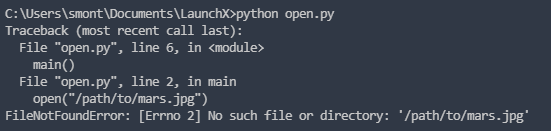

In [3]:
from IPython.display import Image
Image("img/salida_error_traceback.png")


# Try y Except de los bloques

Vamos a usar el ejemplo de navegador a fin de crear código que abra archivos de configuración para la misión de Marte. Los archivos de configuración pueden tener todo tipo de problemas, por lo que es fundamental notificarlos con precisión cuando se presenten. Sabemos que, si no existe un archivo o directorio, se genera FileNotFoundError. Si queremos controlar esa excepción, podemos hacerlo con un bloque try y except:


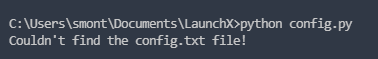

In [7]:
from IPython.display import Image
Image("img/not_found_configtxt.png")


Después de la palabra clave try, agregamos código que tenga la posibilidad de producir una excepción. A continuación, agregamos la palabra clave except junto con la posible excepción, seguida de cualquier código que deba ejecutarse cuando se produce esa condición. Puesto que config.txt no existe en el sistema, Python imprime que el archivo de configuración no está ahí. El bloque try y except, junto con un mensaje útil, evita un seguimiento y sigue informando al usuario sobre el problema.

Aunque es común un archivo que no existe, no es el único error que podemos encontrar. Los permisos de archivo no válidos pueden impedir la lectura de un archivo, incluso si este existe. Vamos a crear un archivo de Python denominado config.py. El archivo tiene código que busca y lee el archivo de configuración del sistema de navegación:

A continuación, quita,ps el archivo config.txt y creamos un directorio denominado config.txt. Intentaremos llamar al archivo config.py para ver un error nuevo que debería ser similar al siguiente:

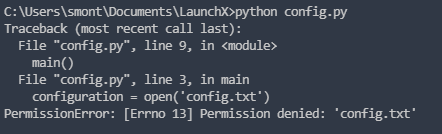

In [9]:
from IPython.display import Image
Image("img/error_configtxt_isdirectory.png")


Una manera poco útil de controlar este error sería detectar todas las excepciones posibles para evitar un traceback. Para comprender por qué detectar todas las excepciones es problemático, probaremos actualizando la función main():

Ahora volvemos a ejecutar el código en el mismo lugar donde existe el archivo config.txt con permisos incorrectos:

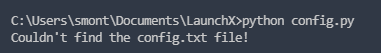

In [10]:
from IPython.display import Image
Image("img/exception.png")


El problema ahora es que el mensaje de error es incorrecto. El archivo existe, pero tiene permisos diferentes y Python no puede leerlo. Cuando se trata con errores de software, puede resultar frustrante tener errores que hagan lo siguiente:

No indiquen cuál es el problema real.
Proporcionen una salida que no coincida con el problema real.
No sugieran lo que se puede hacer para corregir el problema.
Vamos a corregir este fragmento de código para abordar todas estas frustraciones. Revertiremos la detección de FileNotFoundError y luego agregamos otro bloque except para detectar PermissionError:

Ahora volvemos a ejecutarlo, en el mismo lugar donde config.txt está con el problema de permisos:

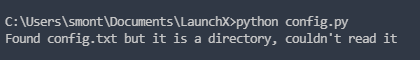

In [11]:
from IPython.display import Image
Image("img/existsdirectory_noread.png")


Eliminamos el archivo config.txt para asegurarnos de que se alcanza el primer bloque except en su lugar:



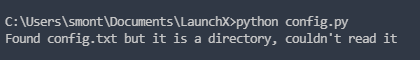

In [12]:
from IPython.display import Image
Image("img/existsdirectory_noread.png")


Cuando los errores son de una naturaleza similar y no es necesario controlarlos individualmente, puedes agrupar las excepciones como una usando paréntesis en la línea except. Por ejemplo, si el sistema de navegación está bajo cargas pesadas y el sistema de archivos está demasiado ocupado, tiene sentido detectar BlockingIOError y TimeOutError juntos:

In [13]:
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")
    except IsADirectoryError:
        print("Found config.txt but it is a directory, couldn't read it")
    except (BlockingIOError, TimeoutError):
        print("Filesystem under heavy load, can't complete reading configuration file")


if __name__ == '__main__':
    main()


Couldn't find the config.txt file!


# Generación de excepciones

Ahora que tienes una buena comprensión de los tracebacks y el control de excepciones, vamos a revisar la generación de excepciones.

Es posible que ya conozcas una situación que podría provocar una condición de error al escribir código. En estas situaciones, resulta útil generar excepciones que permitan que otro código comprenda cuál es el problema.

La generación de excepciones también puede ayudar en la toma de decisiones para otro código. Como hemos visto antes, en función del error, el código puede tomar decisiones inteligentes para resolver, solucionar o ignorar un problema.

Los astronautas limitan su uso de agua a unos 11 litros al día. Vamos a crear una función que, con base al número de astronautas, pueda calcular la cantidad de agua quedará después de un día o más:

In [14]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    return f"Total water left after {days_left} days is: {total_water_left} liters"


In [16]:
# PruProbemos con cinco astronautas, 100 litros de agua sobrante y dos días:
water_left(5, 100, 2)


'Total water left after 2 days is: -10 liters'

Esto no es muy útil, ya que una carencia en los litros sería un error. Después, el sistema de navegación podría alertar a los astronautas que no habrá suficiente agua para todos en dos días. Si eres un ingeniero(a) que programa el sistema de navegación, podrías generar una excepción en la función water_left() para alertar de la condición de error:

In [17]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(
            f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"


Ahora volvemos a ejecutarlo

In [18]:
water_left(5, 100, 2)


RuntimeError: There is not enough water for 5 astronauts after 2 days!

En el sistema de navegación, el código para señalar la alerta ahora puede usar RuntimeError para generar la alerta:

In [19]:
try:
    water_left(5, 100, 2)
except RuntimeError as err:
    alert_navigation_system(err)


NameError: name 'alert_navigation_system' is not defined

La función water_left() también se puede actualizar para evitar el paso de tipos no admitidos. Intentenis pasar argumentos que no sean enteros para comprobar la salida de error:

In [20]:
water_left("3", "200", None)


TypeError: can't multiply sequence by non-int of type 'NoneType'

El error de TypeError no es muy descriptivo en el contexto de lo que espera la función. Actualizaremos la función para que use TypeError, pero con un mensaje mejor:

In [21]:
def water_left(astronauts, water_left, days_left):
    for argument in [astronauts, water_left, days_left]:
        try:
            # If argument is an int, the following operation will work
            argument / 10
        except TypeError:
            # TypError will be raised only if it isn't the right type
            # Raise the same exception but with a better error message
            raise TypeError(
                f"All arguments must be of type int, but received: '{argument}'")
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(
            f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"


Ahora volvemos a intentarlo para obtener un error mejor:

In [22]:
water_left("3", "200", None)


TypeError: All arguments must be of type int, but received: '3'